# **Step 1**

# Datasets and Dataloaders

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.




![out.jpg](https://pytorch.org/tutorials/_images/cifar10.png)

## import libraries

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import torchvision

# We load the CIFAR-10  Dataset with the following parameters:

root is the path where the train/test data is stored,

train specifies training or test dataset,

download=True downloads the data from the internet if it’s not available at root.



In [ ]:
training_data = torchvision.datasets.CIFAR10(root='./data', 
                                             train=True,
                                             download=True,
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
test_data =torchvision.datasets.CIFAR10(root='./data', 
                                        train=False,
                                        download=True,)

Files already downloaded and verified


Label: 9


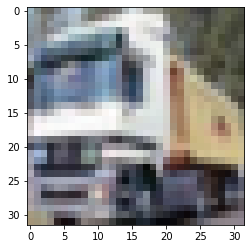

In [ ]:
image, label = training_data[1]
plt.imshow(image)
print('Label:', label)

Label: 1


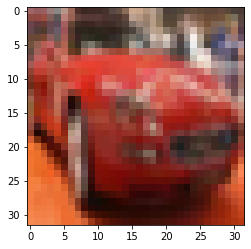

In [ ]:
image, label = training_data[5]
plt.imshow(image)
print('Label:', label)

PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.We'll use the ToTensor transform to convert images into PyTorch tensors.

In [ ]:
from torchvision.transforms import ToTensor

In [ ]:
training_data = torchvision.datasets.CIFAR10(root='./data',
                                             train=True,
                                             transform=ToTensor()
)

In [ ]:
test_data =torchvision.datasets.CIFAR10(root='./data',
                                        train=False,
                                        transform=ToTensor()
)

We can now create data loaders to help us load the data in batches. We'll use a batch size of 64.


In [ ]:

train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader=DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
for images, labels in train_loader:
    print(labels.shape)
    print(images.shape)
    break

torch.Size([64])
torch.Size([64, 3, 32, 32])


# **Step 2**

In [ ]:
classes= ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

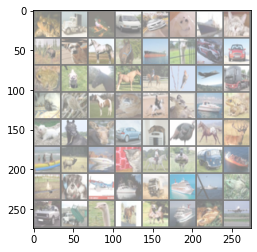

frog  truck frog  truck car   dog   ship  cat   deer  dog   horse horse ship  bird  car   car   frog  dog   horse horse horse bird  plane truck dog   bird  horse dog   horse deer  ship  frog  dog   horse deer  car   cat   bird  horse deer  ship  deer  ship  cat   horse bird  truck ship  bird  dog   plane ship  truck ship  ship  frog  car   truck bird  horse horse ship  frog  plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))

Use the GPU if available

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# **Step 3**

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [ ]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print("loss: ",running_loss)

print('Finished Training')

loss:  821.513427734375
loss:  813.0572962760925
loss:  802.801031768322
loss:  792.271079480648
loss:  783.1822708249092
loss:  773.5788398981094
loss:  764.9621319174767
loss:  755.0941649675369
loss:  743.8113831877708
loss:  739.8686453104019
loss:  729.3163106441498
loss:  717.6215500831604
loss:  712.0413873195648
loss:  707.5907309055328
loss:  693.5448316931725
loss:  686.2609220743179
loss:  680.4029964804649
loss:  672.2057358622551
loss:  663.5138647258282
loss:  656.0704097747803
Finished Training


# **Step 4**

Let us look at how the network performs on the whole dataset.

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


Saving Models

In [ ]:
torch.save(net.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth
